<a href="https://colab.research.google.com/github/ffaraahw/HeartCheck/blob/main/Another_copy_of_Heart_Disease_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library yang Diperlukan

In [ ]:
# Import library untuk analisis data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Konfigurasi tampilan
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Library berhasil diimport!")

Library berhasil diimport!


## 2. Load dan Eksplorasi Dataset

In [ ]:
import kagglehub

# Download latest version of the Heart Disease Health Indicators Dataset
path = kagglehub.dataset_download("alexteboul/heart-disease-health-indicators-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.66M/2.66M [00:00<00:00, 62.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alexteboul/heart-disease-health-indicators-dataset/versions/3


In [ ]:
# 2. Menampilkan isi dari direktori
files = os.listdir(path)
print("Files in dataset directory:")
for file in files:
    print(file)

Files in dataset directory:
heart_disease_health_indicators_BRFSS2015.csv


In [ ]:
# 1. Tentukan nama file sesuai yang muncul di output print(file) kamu tadi
nama_file = 'heart_disease_health_indicators_BRFSS2015.csv'

# 2. Gabungkan path folder dengan nama file agar lengkap
csv_path = os.path.join(path, nama_file)

# 3. Baca datasetnya
df = pd.read_csv(csv_path)
print("=" * 50)
print("INFORMASI DATASET")
print("=" * 50)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nKolom-kolom: {list(df.columns)}")
print("✅ Berhasil load dataset!")
df.head()

INFORMASI DATASET
Jumlah baris: 253680
Jumlah kolom: 22

Kolom-kolom: ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
✅ Berhasil load dataset!


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Informasi tipe data dan missing values
print("=" * 50)
print("INFORMASI TIPE DATA")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("STATISTIK DESKRIPTIF")
print("=" * 50)
df.describe()

INFORMASI TIPE DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#Hapus duplikat data
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
# Daftar kolom yang mau dibuang (Drop)
# Alasan: Fokus ke data medis & fisik, bukan administrasi atau diet simpel
columns_to_drop = [
    'CholCheck',      # Administratif
    'AnyHealthcare',  # Administratif
    'NoDocbcCost',    # Administratif
    'Fruits',         # Data diet kurang detail
    'Veggies',         # Data diet kurang detail
    'Education',
    'Income',
    'MentHlth',
    'PhysHlth',
    'DiffWalk'
]

# Lakukan drop
df_clean = df.drop(columns=columns_to_drop)

# Cek hasilnya
print("Kolom yang tersisa:")
print(f"Jumlah kolom: {df_clean.shape[1]}")
df_clean.head()

Kolom yang tersisa:
Jumlah kolom: 12


,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,GenHlth,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,11.0


DISTRIBUSI Heart_Risk (Heart Disease)
HeartDiseaseorAttack
0.0    206064
1.0     23717
Name: count, dtype: int64

Persentase:
HeartDiseaseorAttack
0.0    89.678433
1.0    10.321567
Name: proportion, dtype: float64


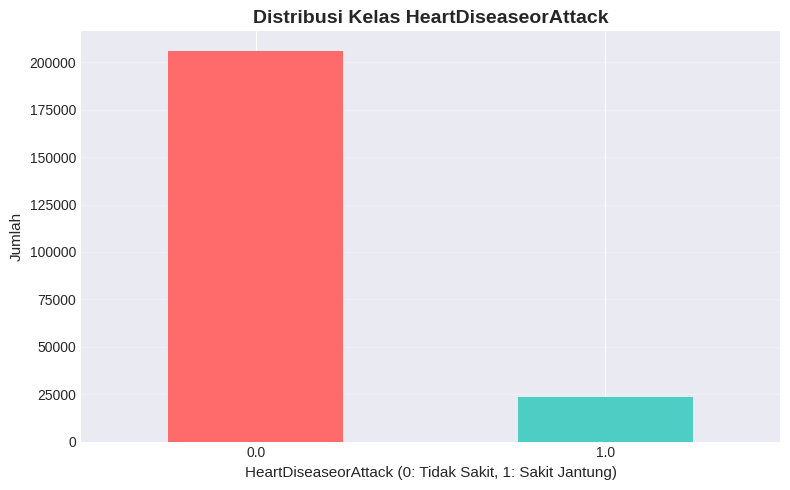

In [ ]:
# Cek distribusi HeartDiseaseorAttack variable
print("=" * 50)
print("DISTRIBUSI Heart_Risk (Heart Disease)")
print("=" * 50)
print(df['HeartDiseaseorAttack'].value_counts())
print(f"\nPersentase:")
print(df['HeartDiseaseorAttack'].value_counts(normalize=True) * 100)

# Visualisasi distribusi HeartDiseaseorAttack
plt.figure(figsize=(8, 5))
df['HeartDiseaseorAttack'].value_counts().plot(kind='bar', color=['#ff6b6b', '#4ecdc4'])
plt.title('Distribusi Kelas HeartDiseaseorAttack', fontsize=14, fontweight='bold')
plt.xlabel('HeartDiseaseorAttack (0: Tidak Sakit, 1: Sakit Jantung)', fontsize=11)
plt.ylabel('Jumlah', fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [ ]:
# Cek missing values
print("=" * 50)
print("CEK MISSING VALUES")
print("=" * 50)
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")


CEK MISSING VALUES
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Total missing values: 0


In [ ]:
final_order = [
    # --- 1. Profil Dasar ---
    'Age',                 # Umur
    'Sex',                 # Jenis Kelamin

    # --- 2. Riwayat Medis & Fisik (Data Objektif) ---
    'HighBP',              # Darah Tinggi
    'HighChol',            # Kolesterol Tinggi
    'BMI',                 # Indeks Massa Tubuh
    'Diabetes',            # Status Diabetes
    'Stroke',              # Riwayat Stroke

    # --- 3. Kondisi Kesehatan Saat Ini (Data Subjektif/Perasaan) ---
    'GenHlth',             # Kesehatan Umum (Skala 1-5)
    # --- 4. Gaya Hidup (Kebiasaan) ---
    'Smoker',              # Perokok (Pernah merokok 100+ batang)
    'HvyAlcoholConsump',   # Konsumsi Alkohol Berat
    'PhysActivity',        # Aktif Olahraga

    # --- 5. Target (Label) ---
    'HeartDiseaseorAttack' # Target Prediksi (Sakit Jantung/Tidak)
]

# Terapkan urutan baru
df_final = df[final_order]

# Cek tampilan
df_final.head()

,Age,Sex,HighBP,HighChol,BMI,Diabetes,Stroke,GenHlth,Smoker,HvyAlcoholConsump,PhysActivity,HeartDiseaseorAttack
0,9.0,0.0,1.0,1.0,40.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0
1,7.0,0.0,0.0,0.0,25.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0
2,9.0,0.0,1.0,1.0,28.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
3,11.0,0.0,1.0,0.0,27.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
4,11.0,0.0,1.0,1.0,24.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0


In [ ]:
# Pisahkan fitur (X) dan HeartDiseaseorAttack (y)
X = df_final.drop('HeartDiseaseorAttack', axis=1)
y = df_final['HeartDiseaseorAttack']

print("\n" + "=" * 50)
print("DATA SIAP UNTUK MODELING")
print("=" * 50)
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Nama fitur: {list(X.columns)}")


DATA SIAP UNTUK MODELING
Jumlah fitur: 11
Jumlah sampel: 229781
Nama fitur: ['Age', 'Sex', 'HighBP', 'HighChol', 'BMI', 'Diabetes', 'Stroke', 'GenHlth', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity']


In [ ]:
for column in df_final.columns:
        # Mengambil nilai unik
        unique_vals = df_final[column].unique()

        # Menghitung jumlah nilai unik
        n_unique = len(unique_vals)

        print(f"Kolom: {column}")
        print(f"Jumlah Nilai Unik: {n_unique}")

        # Jika nilai uniknya terlalu banyak (misal BMI atau SleepTime),
        # kita batasi tampilan agar tidak memenuh-menuhi layar.
        print(f"Nilai: {unique_vals}")

        print("-" * 30)

Kolom: Age
Jumlah Nilai Unik: 13
Nilai: [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
------------------------------
Kolom: Sex
Jumlah Nilai Unik: 2
Nilai: [0. 1.]
------------------------------
Kolom: HighBP
Jumlah Nilai Unik: 2
Nilai: [1. 0.]
------------------------------
Kolom: HighChol
Jumlah Nilai Unik: 2
Nilai: [1. 0.]
------------------------------
Kolom: BMI
Jumlah Nilai Unik: 84
Nilai: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
------------------------------
Kolom: Diabetes
Jumlah Nilai Unik: 3
Nilai: [0. 2. 1.]
------------------------------
Kolom: Stroke
Jumlah Nilai Unik: 2
Nilai: [0. 1.]
------------------------------
Kolom: GenHlth
Jumlah Nilai Unik: 5
Nilai: [5. 3. 2. 

## 4. Split Data (Training & Testing)

In [ ]:
# Split Ulang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("=" * 50)
print("PEMBAGIAN DATA")
print(f"Training: {X_train.shape[0]} | Testing: {X_test.shape[0]}")
print("=" * 50)

print(f"Data Training: {X_train.shape[0]} sampel")
print(f"Data Testing: {X_test.shape[0]} sampel")
print(f"\nPersentase split: 80% training, 20% testing")
print(f"Fitur: {X_train.shape[1]} kolom")




PEMBAGIAN DATA
Training: 183824 | Testing: 45957
Data Training: 183824 sampel
Data Testing: 45957 sampel

Persentase split: 80% training, 20% testing
Fitur: 11 kolom


## 5. Membuat dan Melatih Model Decision Tree dan Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Latih Model
print("\nMelatih Random Forest (Tunggu sebentar)...")
rf_model.fit(X_train, y_train)

# Cek akurasi
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

print("Akurasi Training:", round(train_acc, 4))
print("Akurasi Testing :", round(test_acc, 4))



Melatih Random Forest (Tunggu sebentar)...
Akurasi Training: 0.8132
Akurasi Testing : 0.7795


In [ ]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl', compress=3)

['rf_model.pkl']

## 6. Evaluasi Akurasi Model

AKURASI MODEL
Akurasi Training: 0.8132 (81.32%)
Akurasi Testing:  0.7795 (77.95%)


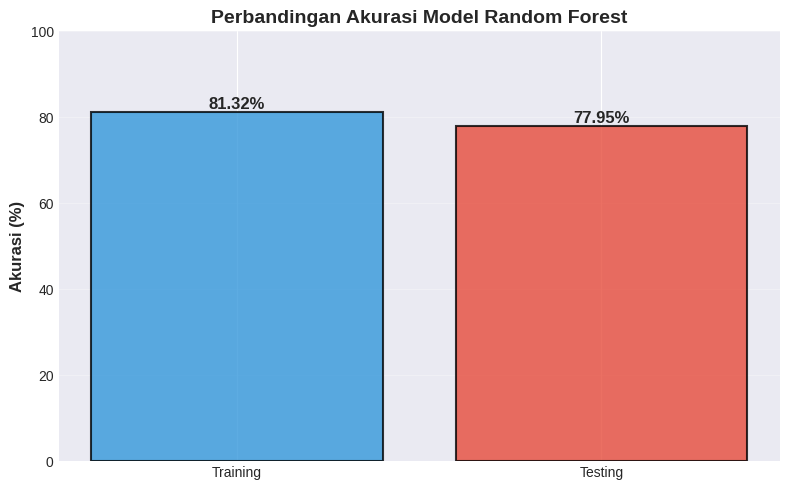

In [ ]:
# Prediksi pada data training dan testing
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Hitung akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=" * 50)
print("AKURASI MODEL")
print("=" * 50)
print(f"Akurasi Training: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Akurasi Testing:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("=" * 50)

# Visualisasi akurasi
fig, ax = plt.subplots(figsize=(8, 5))
accuracies = [train_accuracy * 100, test_accuracy * 100]
labels = ['Training', 'Testing']
colors = ['#3498db', '#e74c3c']

bars = ax.bar(labels, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Tambahkan nilai di atas bar
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.2f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Akurasi (%)', fontsize=12, fontweight='bold')
ax.set_title('Perbandingan Akurasi Model Random Forest', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

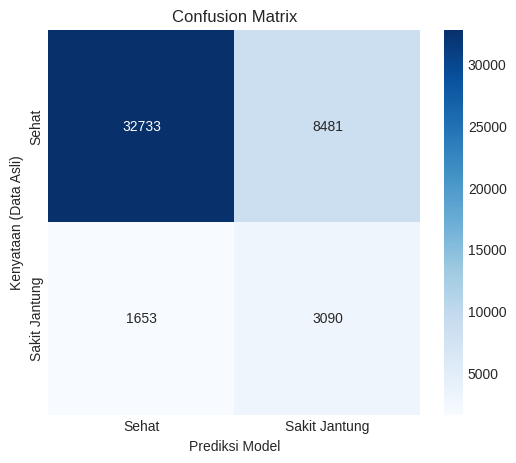

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat prediksi di data test
y_pred = rf_model.predict(X_test)

# Hitung matriks
cm = confusion_matrix(y_test, y_pred)

# Gambar
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sehat', 'Sakit Jantung'],
            yticklabels=['Sehat', 'Sakit Jantung'])
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Data Asli)')
plt.title('Confusion Matrix')
plt.show()


CONFUSION MATRIX
[[32733  8481]
 [ 1653  3090]]


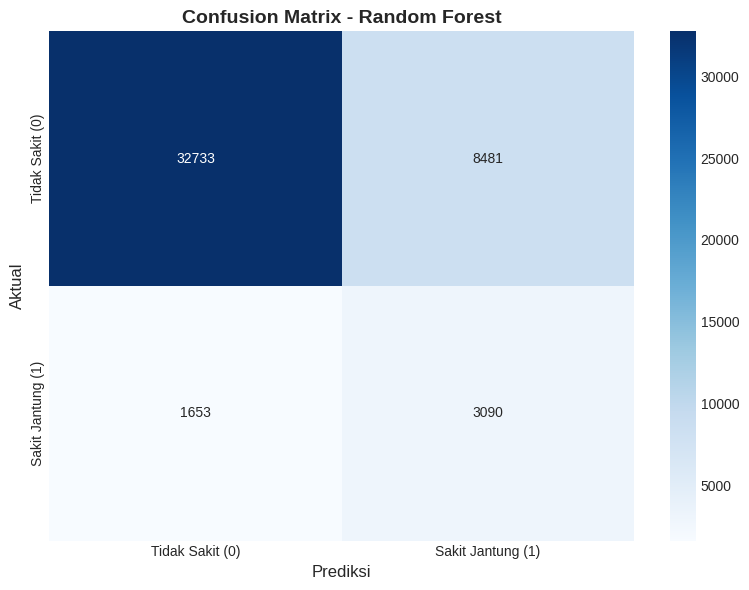

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

print("\n" + "=" * 50)
print("CONFUSION MATRIX")
print("=" * 50)
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Tidak Sakit (0)', 'Sakit Jantung (1)'],
            yticklabels=['Tidak Sakit (0)', 'Sakit Jantung (1)'])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Aktual', fontsize=12)
plt.xlabel('Prediksi', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Classification Report
print("\n" + "=" * 50)
print("CLASSIFICATION REPORT")
print("=" * 50)
print(classification_report(y_test, y_test_pred,
                          target_names=['Tidak Sakit (0)', 'Sakit Jantung (1)']))


CLASSIFICATION REPORT
                   precision    recall  f1-score   support

  Tidak Sakit (0)       0.95      0.79      0.87     41214
Sakit Jantung (1)       0.27      0.65      0.38      4743

         accuracy                           0.78     45957
        macro avg       0.61      0.72      0.62     45957
     weighted avg       0.88      0.78      0.82     45957



## 7. Analisis Feature Importance

FEATURE IMPORTANCE
              Feature  Importance
0                 Age    0.242235
7             GenHlth    0.192834
4                 BMI    0.171024
2              HighBP    0.120872
3            HighChol    0.075398
6              Stroke    0.051145
1                 Sex    0.047369
5            Diabetes    0.041862
8              Smoker    0.027205
10       PhysActivity    0.019329
9   HvyAlcoholConsump    0.010726


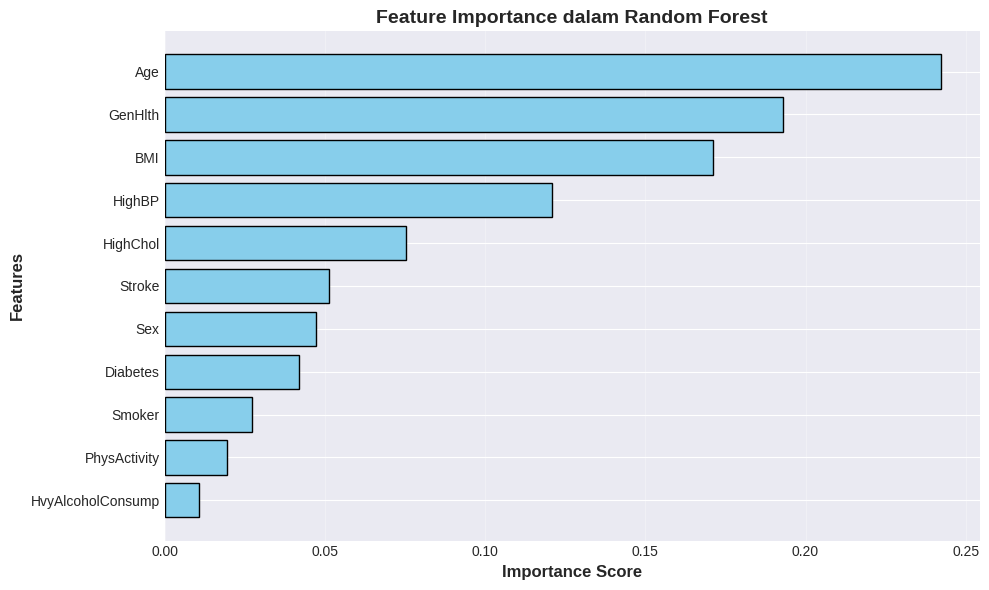

In [ ]:
# Dapatkan feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("=" * 50)
print("FEATURE IMPORTANCE")
print("=" * 50)
print(feature_importance)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance dalam Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Prediksi dengan Input

In [ ]:
import pandas as pd
import numpy as np

# ==========================================
# 1. SETUP DATA 5 PASIEN (Tanpa MentHlth)
# ==========================================

data_5_pasien = {
    # --- PROFIL ---
    'Age':               [1,      4,      9,      10,     13],     # 18thn, 35thn, 60thn, 65thn, 80+thn
    'Sex':               [1,      0,      1,      0,      1],      # 1=Pria, 0=Wanita

    # --- MEDIS ---
    'HighBP':            [1,      0,      1,      1,      1],      # Tensi Tinggi
    'HighChol':          [0,      1,      1,      1,      0],      # Kolesterol
    'BMI':               [22.0,   26.5,   29.0,   38.5,   21.0],   # BMI
    'Diabetes':          [0,      0,      0,      2,      0],      # 0=No, 2=Yes
    'Stroke':            [0,      0,      0,      0,      1],      # Pernah Stroke

    # --- KONDISI & FISIK ---
    'GenHlth':           [1,      2,      3,      5,      4],      # 1=Excellent ... 5=Poor

    # --- GAYA HIDUP ---
    'Smoker':            [0,      1,      1,      0,      1],      # Perokok
    'HvyAlcoholConsump': [0,      0,      1,      0,      0],      # Alkoholik
    'PhysActivity':      [1,      1,      0,      0,      0]       # Olahraga
}

# Buat DataFrame
df_pasien = pd.DataFrame(data_5_pasien)

# Pastikan urutan kolom sesuai X_train (minus MentHlth)
try:
    # Filter kolom X yang ada saja (jaga-jaga kalau urutan beda)
    cols_needed = [c for c in X.columns if c in df_pasien.columns]
    df_pasien = df_pasien[cols_needed]
except NameError: # <-- SUDAH DIPERBAIKI (ADA SPASI)
    pass

# ==========================================
# 2. PREDIKSI MASSAL
# ==========================================

print("="*60)
print(f"{'PASIEN':<10} {'PROFIL SINGKAT':<40} {'PREDIKSI':<15} {'PROBABILITAS'}")
print("="*60)

predictions = rf_model.predict(df_pasien)
probs = rf_model.predict_proba(df_pasien)

deskripsi_pasien = [
    "Muda (18-24), Atletis, Sehat",
    "Dewasa (35-39), Merokok, Kolesterol Dikit",
    "Lansia Awal (60-64), Tensi, Alkoholik",
    "Lansia (65-69), Obesitas Parah, Diabetes",
    "Sangat Tua (80+), Pernah Stroke, Kurus"
]

for i in range(len(df_pasien)):
    status = "🔴 BERISIKO" if predictions[i] == 1 else "🟢 SEHAT"
    prob_persen = probs[i][1] * 100

    print(f"Pasien {i+1:<3} | {deskripsi_pasien[i]:<40} | {status:<15} | {prob_persen:.2f}%")

print("="*60)

PASIEN     PROFIL SINGKAT                           PREDIKSI        PROBABILITAS
Pasien 1   | Muda (18-24), Atletis, Sehat             | 🟢 SEHAT         | 5.74%
Pasien 2   | Dewasa (35-39), Merokok, Kolesterol Dikit | 🟢 SEHAT         | 2.62%
Pasien 3   | Lansia Awal (60-64), Tensi, Alkoholik    | 🔴 BERISIKO      | 63.57%
Pasien 4   | Lansia (65-69), Obesitas Parah, Diabetes | 🔴 BERISIKO      | 78.26%
Pasien 5   | Sangat Tua (80+), Pernah Stroke, Kurus   | 🔴 BERISIKO      | 83.22%


In [ ]:
import pandas as pd

# ==========================================
# EXPERIMENT: "YOUNG BUT DANGEROUS"
# ==========================================

data_anak_muda = {
    # --- PROFIL ---
    'Age':               [13,      13],      # Dua-duanya Umur 18-24 tahun
    'Sex':               [1,      1],      # Laki-laki

    # --- MEDIS ---
    'HighBP':            [1,      1],      # Kanan: Darah Tinggi
    'HighChol':          [1,      1],      # Kanan: Kolesterol Tinggi
    'BMI':               [40.0,   40.0],   # Kanan: Obesitas Morbid (Gemuk Sekali)
    'Diabetes':          [2,      2],      # Kanan: Punya Diabetes
    'Stroke':            [0,      0],      # Kanan: Pernah Stroke (Kasus Ekstrem)

    # --- KONDISI ---
    'GenHlth':           [5,      5],      # Kanan: Merasa kesehatan "Buruk"



    # --- GAYA HIDUP ---
    'Smoker':            [1,      1],      # Kanan: Perokok
    'HvyAlcoholConsump': [1,      1],      # Kanan: Alkoholik
    'PhysActivity':      [0,      0]       # Kanan: Malas Gerak
}

df_test = pd.DataFrame(data_anak_muda)

# Filter kolom sesuai model
try:
    cols_needed = [c for c in X.columns if c in df_test.columns]
    df_test = df_test[cols_needed]
except NameError:
    pass

# Prediksi
preds = rf_model.predict(df_test)
probs = rf_model.predict_proba(df_test)

print("="*60)
print(f"{'KASUS':<20} {'KONDISI':<25} {'HASIL':<15} {'RISIKO'}")
print("="*60)

labels = ["Anak Muda Sehat", "Anak Muda Sakit Parah"]

for i in range(2):
    status = "🔴 BERISIKO" if preds[i] == 1 else "🟢 SEHAT"
    print(f"{labels[i]:<20} | {'Semua Indikator Buruk':<25} | {status:<15} | {probs[i][1]*100:.2f}%")

print("="*60)

KASUS                KONDISI                   HASIL           RISIKO
Anak Muda Sehat      | Semua Indikator Buruk     | 🔴 BERISIKO      | 75.93%
Anak Muda Sakit Parah | Semua Indikator Buruk     | 🔴 BERISIKO      | 75.93%


In [ ]:
import pandas as pd
import numpy as np

print("\n" + "="*45)
print("=== CEK RISIKO JANTUNG (DATASET BARU) ===")
print("="*45)

# --- A. DATA DIRI ---
age_real = int(input("1. Umur Anda (tahun): "))
sex = int(input("2. Jenis Kelamin (1 = Pria, 0 = Wanita): "))

# --- B. FISIK & MEDIS ---
print("\n--- KONDISI FISIK & MEDIS ---")
weight = float(input("3. Berat Badan (kg): "))
height = float(input("4. Tinggi Badan (cm): "))
bmi = weight / ((height/100) ** 2)
print(f"   -> BMI Anda: {bmi:.2f}")

high_bp = int(input("5. Punya Darah Tinggi? (1:Ya, 0:Tidak): "))
high_chol = int(input("6. Punya Kolesterol Tinggi? (1:Ya, 0:Tidak): "))
stroke = int(input("7. Pernah Stroke? (1:Ya, 0:Tidak): "))
diabetic = int(input("8. Diabetes? (0:Tidak, 1:Pre-diabetes, 2:Ya): "))

# --- C. KESEHATAN SAAT INI (SUBJEKTIF) ---
print("\n--- KESEHATAN UMUM (PERASAAN ANDA) ---")
print("(Seberapa sehat perasaanmu secara umum?)")
print("   1: Sehat (Prima / Sangat Baik)")
print("   2: Cukup Sehat (Biasa Saja / Lumayan)")
print("   3: Kurang Sehat (Sering Sakit / Buruk)")
pilihan_user = int(input("9. Pilih kondisi kesehatanmu [1-5]: "))

# --- D. GAYA HIDUP ---
print("\n--- GAYA HIDUP ---")
smoker = int(input("10. Apakah kamu pernah merokok setidaknya 100 batang (5 bungkus) sepanjang hidupmu? (1:Ya, 0:Tidak): "))
alcohol = int(input("11. Peminum Alkohol Berat? (Pria >14 gelas/minggu, Wanita >7 gelas/minggu) (1:Ya, 0:Tidak): "))
phys_activity = int(input("12. Di luar pekerjaan rutin, apakah kamu melakukan aktivitas fisik (seperti jalan santai, lari, berkebun, atau bersepeda) dalam 30 hari terakhir? (1:Ya, 0:Tidak): "))


# ==========================================
# PROSES PREDIKSI
# ==========================================

# 1. Mapping Umur (Sesuai kategori dataset: 1=18-24 ... 13=80+)
if age_real <= 24: age_cat = 1
elif age_real <= 29: age_cat = 2
elif age_real <= 34: age_cat = 3
elif age_real <= 39: age_cat = 4
elif age_real <= 44: age_cat = 5
elif age_real <= 49: age_cat = 6
elif age_real <= 54: age_cat = 7
elif age_real <= 59: age_cat = 8
elif age_real <= 64: age_cat = 9
elif age_real <= 69: age_cat = 10
elif age_real <= 74: age_cat = 11
elif age_real <= 79: age_cat = 12
else: age_cat = 13

# 2. Susun Data Input ke Dictionary
# PENTING: Nama key harus SAMA PERSIS dengan kolom saat training
data_input = {
    'Age': [age_cat],
    'Sex': [sex],
    'HighBP': [high_bp],
    'HighChol': [high_chol],
    'BMI': [bmi],
    'Diabetes': [diabetic],
    'Stroke': [stroke],
    'GenHlth': [gen_health],
    'Smoker': [smoker],
    'HvyAlcoholConsump': [alcohol],
    'PhysActivity': [phys_activity]
    }

# Buat DataFrame
input_df = pd.DataFrame(data_input)

# Pastikan urutan kolom sesuai dengan X_train saat fit model
# (Kode ini otomatis mengurutkan sesuai X.columns jika X ada)
try:
    input_df = input_df[X.columns]
except NameError:
    print("\n[Info] Variabel X tidak ditemukan, menggunakan urutan default dictionary.")

# 3. Prediksi
try:
    pred = rf_model.predict(input_df)
    proba = rf_model.predict_proba(input_df)[0]

    print("\n" + "="*45)
    print(">>> HASIL ANALISIS RISIKO <<<")
    print("="*45)

    if pred[0] == 1.0:
        print("⚠️  KESIMPULAN: BERISIKO TINGGI (High Risk)")
        print("    Saran: Segera lakukan pemeriksaan jantung lebih lanjut.")
    else:
        print("✅  KESIMPULAN: RISIKO RENDAH (Low Risk)")
        print("    Saran: Tetap jaga pola makan dan olahraga.")

    print(f"\nProbabilitas (Kemungkinan) Sakit Jantung: {proba[1]*100:.2f}%")
    print("="*45)

except Exception as e:
    print(f"\nTerjadi error saat prediksi: {e}")
    print("Pastikan nama kolom di 'data_input' sama persis dengan dataset training!")


=== CEK RISIKO JANTUNG (DATASET BARU) ===
1. Umur Anda (tahun): 30
2. Jenis Kelamin (1 = Pria, 0 = Wanita): 1

--- KONDISI FISIK & MEDIS ---
3. Berat Badan (kg): 100
4. Tinggi Badan (cm): 150
   -> BMI Anda: 44.44
5. Punya Darah Tinggi? (1:Ya, 0:Tidak): 0
6. Punya Kolesterol Tinggi? (1:Ya, 0:Tidak): 0
7. Pernah Stroke? (1:Ya, 0:Tidak): 0
8. Diabetes? (0:Tidak, 1:Pre-diabetes, 2:Ya): 0

--- KESEHATAN UMUM (PERASAAN ANDA) ---
(Seberapa sehat perasaanmu secara umum?)
   1: Sehat (Prima / Sangat Baik)
   2: Cukup Sehat (Biasa Saja / Lumayan)
   3: Kurang Sehat (Sering Sakit / Buruk)
9. Pilih kondisi kesehatanmu [1-3]: 2
10. Apakah kamu merasa kesulitan serius saat berjalan kaki atau naik tangga? [1:Ya | 0:Tidak]: 0

--- GAYA HIDUP ---
10. Apakah kamu pernah merokok setidaknya 100 batang (5 bungkus) sepanjang hidupmu? (1:Ya, 0:Tidak): 0
11. Peminum Alkohol Berat? (Pria >14 gelas/minggu, Wanita >7 gelas/minggu) (1:Ya, 0:Tidak): 0
12. Di luar pekerjaan rutin, apakah kamu melakukan aktivitas 